## Sentiment Based Recommendation system

Sathish Poorna 

## Problem Statement
$$/$$
The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

Data sourcing and sentiment analysis
Building a recommendation system
Improving the recommendations using the sentiment analysis model
Deploying the end-to-end project with a user interface
 

Data sourcing and sentiment analysis
In this task, you have to analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 

 

The dataset that you are going to use is inspired by this Kaggle competition. We have made a subset of the original dataset, which has been provided below.

In [1]:
# Importing Relevant Libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Warning 
import warnings
warnings.filterwarnings('ignore')
import string
import re

In [3]:
# nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk  import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import pairwise_distances
from numpy import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sathi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sathi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sathi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sathi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#SKLRN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
# Sampling
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import xgboost as xgb

In [5]:
#Reading the Data set 

df = pd.read_csv("sample30.csv")
pd.options.display.max_colwidth=1000

## EDA

In [6]:
# Shape of the Data Frame 
df.shape


(30000, 15)

In [7]:
#info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [8]:
# Viewing the sample Data 
df.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive


In [9]:
# Distribution of the Numeric Column ("reviews_rating")

df.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
# Checking the percentage of Null values of each coulmn 

null_check=df.isnull().sum()/len(df.index)*100
null_check.round(2)

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64

In [11]:
# reviews_userCity and reviews_userProvince have more than 90% null values 

In [12]:
df.drop(columns=['reviews_userCity','reviews_userProvince'],axis=1,inplace=True)

In [13]:
df.shape

(30000, 13)

In [14]:
df['reviews_didPurchase'].value_counts()

False    14498
True      1434
Name: reviews_didPurchase, dtype: int64

In [15]:
# only 4.78 percent of the reviews have the purchase flas set as True , this coulmn wouldn't be useful as 95% is either null or didn't purchasehence dropping the column 

df.drop(columns=['reviews_didPurchase'],axis=1,inplace=True)

In [16]:
df.shape

(30000, 12)

In [17]:
null_check=df.isnull().sum()/len(df.index)*100
null_check.round(2)

id                     0.00
brand                  0.00
categories             0.00
manufacturer           0.47
name                   0.00
reviews_date           0.15
reviews_doRecommend    8.57
reviews_rating         0.00
reviews_text           0.00
reviews_title          0.63
reviews_username       0.21
user_sentiment         0.00
dtype: float64

In [18]:
df.head(10)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,1,My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely love the ky yours and mine and we thought this would have a similar affect but it did absolutely nothing. Do not buy.,Not worth it,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,1,Bought this earlier today and was excited to check it out. Based on the product description I was expecting something but it was just like the regular KY. We are fans of the his and hers so we just expected more and were left a little disappointed.,Disappointing,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,1,I bought this product for my husband and I to try and we were not impressed at all. There was no tingling or warming. It left us both very sticky. I have used KY products in the past (loved KY his and hers) but this one was disappointing.,Not happy at all,kimmie,Negative
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Lo

In [19]:
df['reviews_doRecommend'].value_counts()

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

In [20]:
#83.3 % of the data for reviews_doRecommend is skewed hence dropping the column 

df.drop(columns=['reviews_doRecommend'],axis=1,inplace=True)

In [21]:
df.shape

(30000, 11)

In [22]:
null_check=df.isnull().sum()/len(df.index)*100
null_check.round(2)

id                  0.00
brand               0.00
categories          0.00
manufacturer        0.47
name                0.00
reviews_date        0.15
reviews_rating      0.00
reviews_text        0.00
reviews_title       0.63
reviews_username    0.21
user_sentiment      0.00
dtype: float64

In [23]:
df.shape

(30000, 11)

In [24]:
## handling Missing values 

In [25]:
#Dropping Null rows as they are less than 1%
df.dropna(subset = ['manufacturer','reviews_title','reviews_date','reviews_username'],inplace = True)
#df.dropna(subset = ['reviews_title'],inplace = True)

In [26]:
df.shape

(29567, 11)

In [27]:
null_check=df.isnull().sum()/len(df.index)*100
null_check.round(2)

id                  0.0
brand               0.0
categories          0.0
manufacturer        0.0
name                0.0
reviews_date        0.0
reviews_rating      0.0
reviews_text        0.0
reviews_title       0.0
reviews_username    0.0
user_sentiment      0.0
dtype: float64

In [28]:
df['reviews_date'] 

0        2012-11-30T06:21:45.000Z
1        2017-07-09T00:00:00.000Z
2        2017-07-09T00:00:00.000Z
3        2016-01-06T00:00:00.000Z
4        2016-12-21T00:00:00.000Z
                   ...           
29995    2017-01-23T00:00:00.000Z
29996    2017-01-27T00:00:00.000Z
29997    2017-01-21T00:00:00.000Z
29998    2017-01-11T00:00:00.000Z
29999    2017-01-19T00:00:00.000Z
Name: reviews_date, Length: 29567, dtype: object

In [29]:
# Converting reviews_date column from object type to Date Time 
df['reviews_date'] = df.reviews_date.apply(lambda x:x[0:4])

In [30]:
df['reviews_date'].value_counts()

2014    8279
2015    6328
2016    4922
2012    4284
2017    3121
2013    1291
2009     480
2011     444
2010     375
2008      22
2007      10
 hoo       8
2018       3
Name: reviews_date, dtype: int64

In [31]:
# removing the 8 rows with invalid time 

df = df[df.reviews_date != ' hoo']

In [32]:
df.shape

(29559, 11)

In [33]:
## PLOTS

<AxesSubplot:xlabel='reviews_date', ylabel='count'>

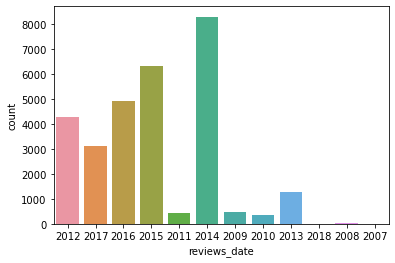

In [34]:
# we will check the rating distribution
sns.countplot(data=df,x='reviews_date')


In [35]:
# 2014 has the highest number of reviews 

<AxesSubplot:xlabel='reviews_rating', ylabel='count'>

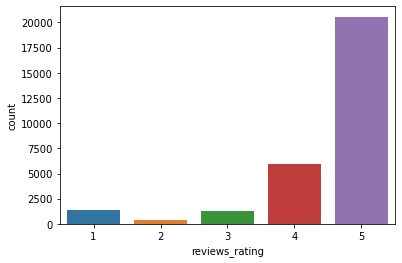

In [36]:
sns.countplot(data=df, x='reviews_rating')

In [37]:
# Majority of the products have been rated 5

In [38]:
df['user_sentiment'].value_counts()

Positive    26254
Negative     3304
Name: user_sentiment, dtype: int64

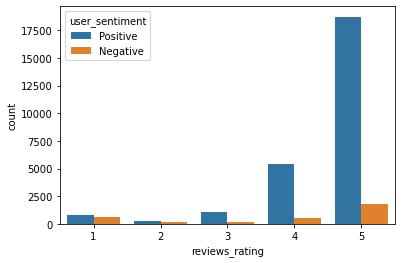

In [39]:
# Plotting User sentiments against the 5 ratings 

sns.countplot(df.reviews_rating, hue =df.user_sentiment)
plt.show()

In [40]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_username',
       'user_sentiment'],
      dtype='object')

## Text Processing 

1) Column identified for Text Processing --> reviews_text,reviews_title,user_sentiment
2) Combine the 2 columns to form a String collumn
3) Remove Special characters
4) convert to lowercase 
5) Remove Stop Words
6) words of length 1 or 2 would not be useful hence removing
7) Remove unwanted white space

In [41]:
## Required Text Processing Functions 

# Function to Remove Special Characters
def special_character_removal(text): 
  text = "".join([char for char in text if char not in string.punctuation])
  return text

# Function to remove stop words 
stop_words = stopwords.words('english')
def stopwords_removal(text):
    words = word_tokenize(text)
    words = [wrd for wrd in words if wrd not in stop_words]
    text = " ".join(words)
    return text

In [42]:
df.head(10)

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016,1,My boyfriend and I bought this to spice things up in the bedroom and we were both highly disappointed in this product. We bought this one because we absolutely love the ky yours and mine and we thought this would have a similar affect but it did absolutely nothing. Do not buy.,Not worth it,samantha,Negative
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016,1,Bought this earlier today and was excited to check it out. Based on the product description I was expecting something but it was just like the regular KY. We are fans of the his and hers so we just expected more and were left a little disappointed.,Disappointing,raeanne,Negative
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016,1,I bought this product for my husband and I to try and we were not impressed at all. There was no tingling or warming. It left us both very sticky. I have used KY products in the past (loved KY his and hers) but this one was disappointing.,Not happy at all,kimmie,Negative
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016,1,My husband and I bought this for some extra fun. We werevboth extremely disappointed. Especially for the price! Do not waste your money on this product. We felt nothing but a sticky mess f

In [43]:
# Combining reviews_text and reviews_title
df['review_title_text'] = df['reviews_title']+' '+ df['reviews_text'] 

In [44]:
# Converting the type of review_title_text column to String type
df['review_title_text'] = df['review_title_text'].astype('str')

In [45]:
#df['review_title_text']

In [46]:
#User_Sentiments Column
df['user_sentiment'].value_counts()

Positive    26254
Negative     3304
Name: user_sentiment, dtype: int64

In [47]:
# Mapping Negative to 0 and Positive to 1 

df['user_sentiment']= df.user_sentiment.apply(lambda x:1 if x == 'Positive' else 0 )

In [48]:
df['user_sentiment'].value_counts()

1    26254
0     3305
Name: user_sentiment, dtype: int64

In [49]:
# converting review_title_text to lower case

df['review_title_text'] = df.review_title_text.str.lower()

In [50]:
# Remving Special Character ('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~') from review_title_text using string.punctuation

df['review_title_text'] = df.review_title_text.apply(lambda x : special_character_removal(x))

In [51]:
df['review_title_text'].head(5)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy
1                                                                                                                                                                                                                                                                                                                  

In [52]:
# Removing Stopwords by using teh function defined above 
df['review_title_text'] = df.review_title_text.apply(lambda X : stopwords_removal(X))
df['review_title_text'].head(5)

0                                                                                                                                                                                                                                                                                                                                   awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy
1                                                                                                                                                                                                                                                                                                                                                                                                        good good flavor review collected part promotion
2                                                                                                                   

In [53]:
# we see the use of numbers in the review , Removing Numbers from review text 

df['review_title_text'] = df.review_title_text.apply(lambda X : re.sub(r'\d+', '', X))
df['review_title_text'].head(5)

0                                                                                                                                                                                                                                                                                                                                  awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphors crazy
1                                                                                                                                                                                                                                                                                                                                                                                                      good good flavor review collected part promotion
2                                                                                                                       

In [54]:
# Numbers are removed 

In [55]:
df['review_title_text'].head(5)

0                                                                                                                                                                                                                                                                                                                                  awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphors crazy
1                                                                                                                                                                                                                                                                                                                                                                                                      good good flavor review collected part promotion
2                                                                                                                       

In [56]:
    # words of length 1 or 2 would not be useful hence removing
    df['review_title_text'] = df['review_title_text'].replace(r'\b[a-zA-Z]{1,2}\b','', regex=True)

    #Removing unwanted white spaces
    df['review_title_text'] = df['review_title_text'].replace(r'^\s+|\s+$'," ", regex=True)
    df['review_title_text'].head(5)

0                                                                                                                                                                                                                                                                                                                                awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphors crazy
1                                                                                                                                                                                                                                                                                                                                                                                                    good good flavor review collected part promotion
2                                                                                                                           

In [57]:
# Word Toekenisation 

df['token'] = df['review_title_text'].apply(word_tokenize)

In [58]:
df.head(3)

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_title_text,token
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,1,awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphors crazy,"[awesome, love, album, good, hip, hop, side, current, pop, sound, hype, listen, everyday, gym, give, star, rating, way, metaphors, crazy]"
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,1,good good flavor review collected part promotion,"[good, good, flavor, review, collected, part, promotion]"
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017,5,Good flavor.,Good,dorothy w,1,good good flavor,"[good, good, flavor]"


In [59]:
# Function for Lemmatization 
lemmatizer = WordNetLemmatizer()
def pos_tagging(tokens):
    lemmattized_array = []
    for word, tag in pos_tag(tokens):
        tag_1 = tag[0].lower()
        tag_1 = tag_1 if tag_1 in ['a', 'r', 'n', 'v'] else None
        if not tag_1:
            lemmattized_array.append(word)
        else:
            lemmattized_array.append(lemmatizer.lemmatize(word, tag_1))
    return lemmattized_array

In [60]:
df['lemmatized_token'] = df.token.apply(lambda x: pos_tagging(x))

In [61]:
df[['token','lemmatized_token']]

,token,lemmatized_token
0,"[awesome, love, album, good, hip, hop, side, current, pop, sound, hype, listen, everyday, gym, give, star, rating, way, metaphors, crazy]","[awesome, love, album, good, hip, hop, side, current, pop, sound, hype, listen, everyday, gym, give, star, rating, way, metaphor, crazy]"
1,"[good, good, flavor, review, collected, part, promotion]","[good, good, flavor, review, collect, part, promotion]"
2,"[good, good, flavor]","[good, good, flavor]"
3,"[disappointed, read, reviews, looking, buying, one, couples, lubricants, ultimately, disappointed, didnt, even, live, reviews, read, starters, neither, boyfriend, could, notice, sort, enhanced, captivating, sensation, notice, however, messy, consistency, reminiscent, liquidy, vaseline, difficult, clean, pleasant, especially, since, lacked, captivating, sensation, expecting, disappointed, paid, much, lube, wont, use, could, use, normal, personal, lubricant, less, money, less, mess]","[disappoint, read, review, look, buy, one, couple, lubricant, ultimately, disappointed, didnt, even, live, review, read, starter, neither, boyfriend, could, notice, sort, enhanced, captivate, sensation, notice, however, messy, consistency, reminiscent, liquidy, vaseline, difficult, clean, pleasant, especially, since, lack, captivate, sensation, expect, disappoint, pay, much, lube, wont, use, could, use, normal, personal, lubricant, less, money, less, mess]"
4,"[irritation, husband, bought, gel, gel, caused, irritation, felt, like, burning, skin, wouldnt, recommend, gel]","[irritation, husband, buy, gel, gel, cause, irritation, felt, like, burn, skin, wouldnt, recommend, gel]"
...,...,...
29995,"[softness, got, conditioner, influenster, try, loving, far, oily, hair, use, ends, hair, feels, amazing, soft, mess, review, collected, part, promotion]","[softness, get, conditioner, influenster, try, love, far, oily, hair, use, end, hair, feel, amaze, soft, mess, review, collect, part, promotion]"
29996,"[love, love, received, review, purposes, influenster, leaves, hair, feeling, fresh, smelling, great]","[love, love, receive, review, purpose, influenster, leave, hair, feel, fresh, smelling, great]"
29997,"[hair, smooth, use, first, love, smell, product, wash, hair, smooth, easy, brush, receive, product, influenster, testing, purposes, opinions, review, collected, part, promotion]","[hair, smooth, use, first, love, smell, product, wash, hair, smooth, easy, brush, receive, product, influenster, test, purpose, opinion, review, collect, part, promotion]"
29998,"[perfect, oily, hair, received, influenster, never, back, anything, else, normally, dont, use, conditioner, hair, oily, fine, make, hair, feel, heavy, doesnt, get, oily, day, really, fantastic, plan, buying, future, review, collected, part, promotion]","[perfect, oily, hair, receive, influenster, never, back, anything, else, normally, dont, use, conditioner, hair, oily, fine, make, hair, feel, heavy, doesnt, get, oily, day, really, fantastic, plan, buy, future, review, collect, part, promotion]"


In [62]:
df['review_final'] = df['lemmatized_token'].apply(lambda x: ' '.join(word for word in x))
df['review_final'].head(5)

0                                                                                                                                                                                                                                                                                                     awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy
1                                                                                                                                                                                                                                                                                                                                                                          good good flavor review collect part promotion
2                                                                                                                                                                                   

In [63]:


x=df['review_final'] 
y=df['user_sentiment']

# Splitting the dataset in to test and train
seed=100
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

# TFIDF
word_vectorizer = TfidfVectorizer(strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 3),stop_words='english',sublinear_tf=True)

In [64]:
#Shape of X_Train Y_Train 
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (20691,)
y_train (20691,)
X_test (8868,)
y_test (8868,)


In [65]:
# Function to display 
def display_score(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot() 
    print(classifier)
    print('Accuracy is ', accuracy_score(y_test, classifier.predict(X_test)))
    print('Sensitivity is {}'.format(cm[1][1]/sum(cm[1])))
    print('Specificity is {}'.format(cm[0][0]/sum(cm[0])))

In [66]:
#create a function for plotting confusion matrix

def cm_plot(cm_train,cm_test):
    print("Confusion matrix ")
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.heatmap(cm_train/np.sum(cm_train), annot=True , fmt = ' .2%',cmap="Greens")
    plt.subplot(1,2,2)
    sns.heatmap(cm_test/np.sum(cm_test), annot=True , fmt = ' .2%',cmap="Greens")
    plt.show()

In [67]:
#create a function for calculating Sensitivity and Specificity
def spec_sensitivity(cm_train,cm_test):
    
    #Train
    tn, fp, fn, tp = cm_train.ravel()
    specificity_train = tn / (tn+fp)
    sensitivity_train = tp / float(fn + tp)
    
    print("sensitivity for train set: ",sensitivity_train)
    print("specificity for train set: ",specificity_train)
    print("\n****\n")
    
    #Test
    tn, fp, fn, tp = cm_test.ravel()
    specificity_test = tn / (tn+fp)
    sensitivity_test = tp / float(fn + tp)
    
    print("sensitivity for test set: ",sensitivity_test)
    print("specificity for train set: ",specificity_test)

In [68]:
# fit_transform X_train
X_train_tf = word_vectorizer.fit_transform(X_train)
# transform X_test
X_test_tf = word_vectorizer.transform(X_test)

#Shape of X_Train X_Test after transform
print('X_train_tf', X_train_tf.shape)
print('X_test_tf', X_test_tf.shape)


In [69]:
# Performing Over Sampling to correct the biased data 

sampling = over_sampling.RandomOverSampler(random_state=0)
X_train, y_train = sampling.fit_resample(pd.DataFrame(X_train), pd.Series(y_train))
X_train = pd.DataFrame(X_train).iloc[:,0].tolist()


In [70]:
X_train_transformed = word_vectorizer.transform(X_train)
X_test_transformed = word_vectorizer.transform(X_test.tolist())

In [71]:
## Model Building

## 1) Logistinc Regression 


In [72]:
md_log = LogisticRegression()
md_log.fit(X_train_transformed,y_train)

LogisticRegression()

In [73]:
y_train_pred_logit = md_log.predict(X_train_transformed)

print("Logistic Regression train accuracy ", accuracy_score(y_train_pred_logit, y_train),"\n")
print(classification_report(y_train_pred_logit, y_train))

Logistic Regression train accuracy  0.9895827666866126 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18718
           1       0.98      1.00      0.99     18048

    accuracy                           0.99     36766
   macro avg       0.99      0.99      0.99     36766
weighted avg       0.99      0.99      0.99     36766



In [74]:
y_test_pred_logit = md_log.predict(X_test_transformed)

print("Logistic Regression accuracy on test data", accuracy_score(y_test_pred_logit, y_test),"\n")
print(classification_report(y_test_pred_logit, y_test))

Logistic Regression accuracy on test data 0.9145241317095174 

              precision    recall  f1-score   support

           0       0.58      0.63      0.61       923
           1       0.96      0.95      0.95      7945

    accuracy                           0.91      8868
   macro avg       0.77      0.79      0.78      8868
weighted avg       0.92      0.91      0.92      8868



In [75]:
cm_train = metrics.confusion_matrix(y_train, y_train_pred_logit)
cm_test = metrics.confusion_matrix(y_test, y_test_pred_logit)

In [76]:
spec_sensitivity(cm_train,cm_test)

sensitivity for train set:  0.9804710874177229
specificity for train set:  0.9986944459555024

****

sensitivity for test set:  0.9565493584042688
specificity for train set:  0.5827482447342026


Confusion matrix 


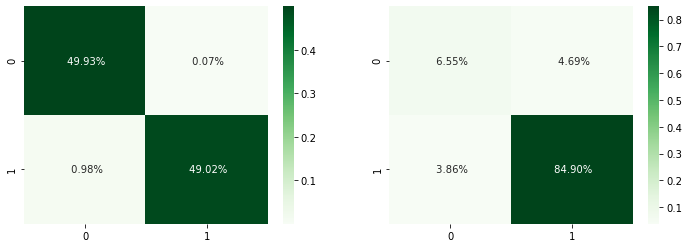

In [77]:
cm_plot(cm_train,cm_test)

In [78]:
## Naive Bayes

md_nb = MultinomialNB()
md_nb = MultinomialNB()
md_nb.fit(X_train_transformed,y_train)


MultinomialNB()

In [79]:
# Train Accuracy
y_train_pred_mnb = md_nb.predict(X_train_transformed)

print("Naive Bayes accuracy on train data", accuracy_score(y_train_pred_mnb, y_train),"\n")
print(classification_report(y_train_pred_mnb, y_train))

Naive Bayes accuracy on train data 0.9839253658271229 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     18912
           1       0.97      1.00      0.98     17854

    accuracy                           0.98     36766
   macro avg       0.98      0.98      0.98     36766
weighted avg       0.98      0.98      0.98     36766



In [80]:
# Test Accuracy 
y_test_pred_mnb = md_nb.predict(X_test_transformed)

print("Naive Bayes accuracy on test data", accuracy_score(y_test_pred_mnb, y_test),"\n")
print(classification_report(y_test_pred_mnb, y_test))

Naive Bayes accuracy on test data 0.8647947677041047 

              precision    recall  f1-score   support

           0       0.60      0.43      0.50      1408
           1       0.90      0.95      0.92      7460

    accuracy                           0.86      8868
   macro avg       0.75      0.69      0.71      8868
weighted avg       0.85      0.86      0.86      8868



In [81]:
cm_train_mnb = metrics.confusion_matrix(y_train, y_train_pred_mnb)
cm_test_mnb = metrics.confusion_matrix(y_test, y_test_pred_mnb)

In [82]:
spec_sensitivity(cm_train_mnb,cm_test_mnb)

sensitivity for train set:  0.9695370722950553
specificity for train set:  0.9983136593591906

****

sensitivity for test set:  0.8977258289925041
specificity for train set:  0.60481444332999


Confusion matrix 


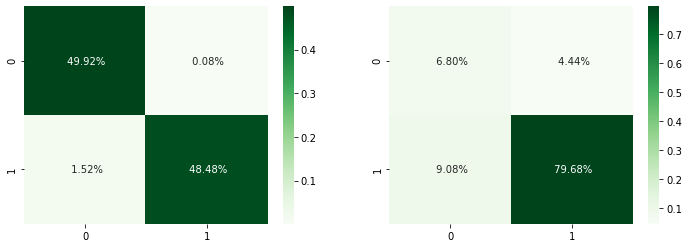

In [83]:
cm_plot(cm_train_mnb,cm_test_mnb)

In [84]:
## Random Forest 


md_rf = RandomForestClassifier(n_estimators=50, random_state=seed, n_jobs=-1)
md_rf.fit(X_train_transformed,y_train)


RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=100)

In [85]:
## Train Accuracy 

y_train_pred_rf = md_rf.predict(X_train_transformed)

print("Random Forest accuracy on train data", accuracy_score(y_train_pred_rf, y_train),"\n")
print(classification_report(y_train_pred_rf, y_train))

Random Forest accuracy on train data 1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18383
           1       1.00      1.00      1.00     18383

    accuracy                           1.00     36766
   macro avg       1.00      1.00      1.00     36766
weighted avg       1.00      1.00      1.00     36766



In [86]:
## Test Accuracy 

y_test_pred_rf = md_rf.predict(X_test_transformed)

print("Naive Bayes accuracy on test data", accuracy_score(y_test_pred_rf, y_test),"\n")
print(classification_report(y_test_pred_rf, y_test))

Naive Bayes accuracy on test data 0.9092241768155165 

              precision    recall  f1-score   support

           0       0.29      0.75      0.42       382
           1       0.99      0.92      0.95      8486

    accuracy                           0.91      8868
   macro avg       0.64      0.83      0.68      8868
weighted avg       0.96      0.91      0.93      8868



In [87]:
# F1 score 68%

In [88]:
cm_train_rf = metrics.confusion_matrix(y_train, y_train_pred_rf)
cm_test_rf = metrics.confusion_matrix(y_test, y_test_pred_rf)

Confusion matrix 


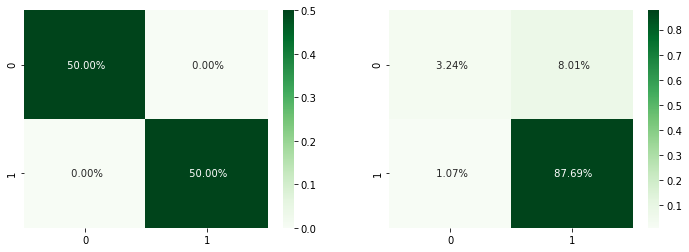

In [89]:
cm_plot(cm_train_rf,cm_test_rf)

## XG Boost 

In [90]:
md_xgb = xgb.XGBClassifier(learning_rate=0.3,max_depth=6,min_child_weight=1,n_estimators=100,eval_metric='mlogloss')
md_xgb.fit(X_train_transformed,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [91]:
## Train Accuracy 

y_train_pred_xgb = md_xgb.predict(X_train_transformed)

print("XG Boost accuracy on train data", accuracy_score(y_train_pred_xgb, y_train),"\n")
print(classification_report(y_train_pred_xgb, y_train))

XG Boost accuracy on train data 0.9439155741717892 

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     19967
           1       0.90      0.99      0.94     16799

    accuracy                           0.94     36766
   macro avg       0.94      0.95      0.94     36766
weighted avg       0.95      0.94      0.94     36766



In [92]:
## Test Accuracy 

y_test_pred_xgb = md_xgb.predict(X_test_transformed)

print("Naive Bayes accuracy on test data", accuracy_score(y_test_pred_xgb, y_test),"\n")
print(classification_report(y_test_pred_xgb, y_test))

Naive Bayes accuracy on test data 0.8650202976995941 

              precision    recall  f1-score   support

           0       0.69      0.44      0.54      1580
           1       0.89      0.96      0.92      7288

    accuracy                           0.87      8868
   macro avg       0.79      0.70      0.73      8868
weighted avg       0.85      0.87      0.85      8868



In [93]:
# F1 score 73%

In [94]:
cm_train_xgb = metrics.confusion_matrix(y_train, y_train_pred_xgb)
cm_test_xgb = metrics.confusion_matrix(y_test, y_test_pred_xgb)

In [95]:
spec_sensitivity(cm_train_xgb,cm_test_xgb)

sensitivity for train set:  0.9008322907033672
specificity for train set:  0.9869988576402111

****

sensitivity for test set:  0.8869266929233897
specificity for train set:  0.6920762286860582


Confusion matrix 


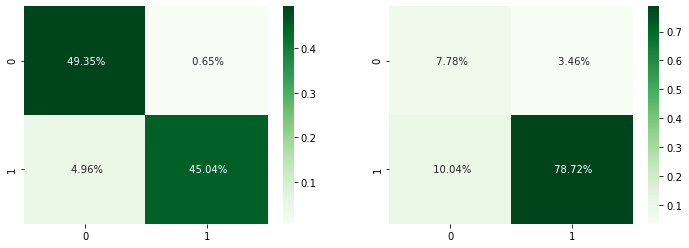

In [96]:
cm_plot(cm_train_xgb,cm_test_xgb)

## From teh Results above the Logistic regression shows a better F1 score for macro Avg , Hence selecting Logistic regression 

In [97]:
df.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_username',
       'user_sentiment', 'review_title_text', 'token', 'lemmatized_token',
       'review_final'],
      dtype='object')

## Recommendation System

# Columns identified for recommendation system
reviews_username,name,reviews_rating


In [98]:
recommendation_df= df[['name','reviews_username','reviews_rating']]

In [99]:
recommendation_df.head(5)

,name,reviews_username,reviews_rating
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5
1,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5
2,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5
3,K-Y Love Sensuality Pleasure Gel,rebecca,1
4,K-Y Love Sensuality Pleasure Gel,walker557,1


In [100]:
# Splitting the Data frame in to train and Test

train, test = train_test_split(recommendation_df, test_size=0.30, random_state=31)

In [101]:
train.shape, test.shape

((20691, 3), (8868, 3))

In [102]:
# Unique values of user name and Products
print(train["reviews_username"].nunique())
print(train["name"].nunique())

18021
233


In [103]:
# Creating User Product Rating Matrix with user as index , products as columns
df_pivot = train.pivot_table(index = 'reviews_username', columns = 'name', values = 'reviews_rating')
df_pivot = df_pivot.fillna(0)
df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
df_pivot.shape

(18021, 233)

In [105]:
# Dummy Train data to rate products that are not reviewed by the customer 
dummy_train = train.copy()
# Not rated products is set to 1 and rated products are set to 0
dummy_train["reviews_rating"]= dummy_train["reviews_rating"].apply(lambda x:1 if x==0 else 0)


In [106]:
# creating matrix with products as columns and users as rows 
df_dummy_pivot = dummy_train.pivot_table(index = 'reviews_username', columns = 'name', values = 'reviews_rating')
df_dummy_pivot = df_dummy_pivot.fillna(1)
df_dummy_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [107]:
# User Similarity Matrix
# Create a user-Product matrix.
df_pivot = train.pivot_table(index='reviews_username',columns='name',values='reviews_rating')

In [108]:
mean = np.nanmean(df_pivot, axis=1)
df_sub = (df_pivot.T-mean).T

In [109]:
df_sub.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# User Similarity matrix using Pair wise dist

user_correlation = 1 - pairwise_distances(df_sub.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)
np.shape(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(18021, 18021)

## Prediction of User based model

In [111]:
## Prediction of User based model--> ignoring negative correlated users

user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [112]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings
user_predicted_ratings.shape

(18021, 233)

In [113]:
## Multiplying predicted_ratings with dummy_train so that all the products that were already rated are set to 0

final_rating_user = np.multiply(user_predicted_ratings,df_dummy_pivot)


In [114]:
final_rating_user.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Evaluation of User Based Model 


In [115]:
# Matching users from test and train data set

match = test[test.reviews_username.isin(train.reviews_username)]
match.shape

(1987, 3)

In [116]:
# Creating User Product matric for evaluation 
matching_user_mat = match.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [117]:
# Converting the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df['reviews_username'] = df_sub.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18011,18012,18013,18014,18015,18016,18017,18018,18019,18020
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
username_list = match.reviews_username.tolist()

In [119]:
user_correlation_df.columns = df_sub.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(username_list)]
user_correlation_df_1.shape

(1675, 18021)

In [120]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(username_list)]

In [121]:
user_correlation_df_3 = user_correlation_df_2.T

In [122]:
user_correlation_df_3[user_correlation_df_3<0]=0

matching_user_predicted_ratings = np.dot(user_correlation_df_3, matching_user_mat.fillna(0))
matching_user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 1.15470054,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.84003456, 0.        , 0.        , ..., 0.        , 2.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [123]:
dummy_test = match.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)
dummy_test.shape

(1675, 117)

In [124]:
matching_user_predicted= np.multiply(matching_user_predicted_ratings,dummy_test)

## RMSE Calculation 

In [125]:
X = matching_user_predicted.copy() 
X = X[X>0]
scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [126]:
match_1 = match.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [127]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [128]:
rmse = (sum(sum((match_1 - y )**2))/total_non_nan)**0.5
print(rmse)

2.428075775212277


## Item based Recommendation

In [129]:

#Taking the transpose of the rating matrix to normalize the rating around the mean for different products ID

df_pivot = train.pivot_table(index='reviews_username',columns='name',values='reviews_rating').T
df_pivot.head()

reviews_username,00dog3,01impala,02dakota,0325home,06stidriver,08dallas,09mommy11,1085,10ten,1143mom,...,zombiegirl22,zombiekiller14,zone,zout22389,zpalma,zsazsa,zt313,zubb,zulaa118,zzdiane
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Using adjusted cosine to normalize product rating
mean = np.nanmean(df_pivot, axis=1)
df_subt = (df_pivot.T-mean).T
df_subt.head()

reviews_username,00dog3,01impala,02dakota,0325home,06stidriver,08dallas,09mommy11,1085,10ten,1143mom,...,zombiegirl22,zombiekiller14,zone,zout22389,zpalma,zsazsa,zt313,zubb,zulaa118,zzdiane
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,0.310345,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
item_correlation = 1 - pairwise_distances(df_subt.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)
item_correlation.shape

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


(233, 233)

In [132]:
# ignoring negatively correlated items

item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [133]:
## Item based Prediction 
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.02023095, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00262634,
        0.0087965 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00437724,
        0.01466083],
       ...,
       [0.02218725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.01334446],
       [0.        , 0.00818635, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.03585012, 0.        ,
        0.        ]])

In [134]:
item_predicted_ratings.shape

(18021, 233)

In [135]:
dummy_train.shape

(20691, 3)

In [136]:
## Using only the unrated products 

In [137]:
item_final_rating = np.multiply(item_predicted_ratings,df_dummy_pivot)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.020231,0.000000,0.000000
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.013444,0.0,0.0,0.000000,0.0,0.0,0.000000,0.002626,0.008797
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.022406,0.0,0.0,0.000000,0.0,0.0,0.000000,0.004377,0.014661
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.006432,0.0,0.0,0.000512,0.001442,0.000000
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.006432,0.0,0.0,0.000512,0.001442,0.000000


## Evaluation 


In [138]:
test.columns

Index(['name', 'reviews_username', 'reviews_rating'], dtype='object')

In [139]:
match =  test[test.name.isin(train.name)]
match.shape

(8851, 3)

In [140]:
common_item_based_matrix = match.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T
common_item_based_matrix.shape

(169, 8262)

In [141]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,223,224,225,226,227,228,229,230,231,232
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
item_correlation_df['name'] = df_subt.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,223,224,225,226,227,228,229,230,231,232
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
list_name = match.name.tolist()

In [144]:
item_correlation_df.columns = df_subt.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [145]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [146]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4",...,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02151007, 0.        , 0.00051191, ..., 0.00020477, 0.00051191,
        0.00040953],
       [0.        , 0.00350179, 0.00144212, ..., 0.00057685, 0.00144212,
        0.00115369],
       [0.        , 0.01172867, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [148]:
common_item_predicted_ratings.shape

(169, 8262)

In [149]:
dummy_test = match.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [150]:
common_ = match.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [151]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [152]:
# Finding sum of non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [153]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5496049306264057


In [154]:
# save the Pickle files
import pickle
pickle.dump(final_rating_user,open('user_predicted_ratings.pkl','wb'))
user_predicted_ratings =  pickle.load(open('user_predicted_ratings.pkl', 'rb'))

In [155]:
## User Input for Name 



In [156]:
user_input = input("Enter user_name")
print(user_input)

Enter user_namedorothy w
dorothy w


In [157]:
# Recommending the Top 5 products to the user.
d = user_predicted_ratings.loc[user_input].sort_values(ascending=False)[0:20]
d

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                          0.0
Plum Organics Just Prunes                                                              0.0
Pantene Pro-V Expert Collection Age Defy Conditioner                                   0.0
Pearhead Id Bracelet Frame                                                             0.0
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack        0.0
Physicians Formula Mineral Wear Talc-Free Mineral Correcting Powder, Creamy Natural    0.0
Physicians Formula Powder Palette Mineral Glow Pearls, Translucent Pearl               0.0
Pinaud Clubman Styling Gel, Superhold                                                  0.0
Pink Friday: Roman Reloaded Re-Up (w/dvd)                                              0.0
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                    0.0
Plano Mini-Magnum 13-Compartment Tackle Box                                          

In [158]:
# save the respective files and models through Pickle 
import pickle
pickle.dump(md_log,open('logistic_model.pkl', 'wb'))
# loading pickle object
md_log =  pickle.load(open('logistic_model.pkl', 'rb'))

pickle.dump(word_vectorizer,open('word_vectorizer.pkl','wb'))
# loading pickle object
word_vectorizer = pickle.load(open('word_vectorizer.pkl','rb'))

## Function to Filter Top 5 Products


In [159]:
def top_5_recommendation(user_input):
    arr = final_rating_user.loc[user_input].sort_values(ascending=False)[0:20]

    # Based on positive sentiment percentage.
    i= 0
    a = {}
    for prod_name in arr.index.tolist():
        product = prod_name
        product_name_review_list =df[df['name']== product]['review_final'].tolist()
        features= word_vectorizer.transform(product_name_review_list)
        md_log.predict(features)
        a[product] = md_log.predict(features).mean()*100
    b= pd.Series(a).sort_values(ascending = False).head(5).index.tolist()
    print("Enter Username : ",user_input)
    print("Five Recommendations for you :")
    for i,val in enumerate(b):
        print(i+1,val)

In [160]:
top_5_recommendation(user_input)

Enter Username :  dorothy w
Five Recommendations for you :
1 Pearhead Id Bracelet Frame
2 Pink Friday: Roman Reloaded Re-Up (w/dvd)
3 Plum Organics Just Prunes
4 Progresso Traditional Chicken Rice With Vegetables Soup
5 Pantene Pro-V Expert Collection Age Defy Conditioner


In [161]:
df.to_csv("clean_data.csv",index=False)